Cборный проект - 1

В нашем распоряжении данные из открытых источников о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation) до 2016 года. Нам нужно провести исследование для международного магазина видеоигр: на исторических данных выявить определяющие успешность игры закономерности.
Цель : выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Описание данных:
Name — название игры
Platform — платформа
Year_of_Release — год выпуска
Genre — жанр игры
NA_sales — продажи в Северной Америке (миллионы долларов)
EU_sales — продажи в Европе (миллионы долларов)
JP_sales — продажи в Японии (миллионы долларов)
Other_sales — продажи в других странах (миллионы долларов)
Critic_Score — оценка критиков (максимум 100)
User_Score — оценка пользователей (максимум 10)
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

План работы над проектом:

 1 Просмотреть таблицу  пропущенные значения.
 
 2 Провести предобработку таблицы: замена столбцов, заполнение пропусков, удаление дубликатов и т.д.
 
 3 Провести анализ по данным и подготовить актуальные данные.
 
 4 Составить портреты пользователей для купных регионов продаж.
 
 5 Выполнить проверку гипотез.
 


### Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from math import factorial
from scipy import stats as st

In [2]:
games = pd.read_csv('/datasets/games.csv')

In [3]:
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
print(games.duplicated().sum())

0


In [6]:
print(games.duplicated(subset=['Name', 'Platform', 'Year_of_Release'], keep=False).sum())

4


In [7]:
games = games.drop_duplicates(subset=['Name', 'Platform', 'Year_of_Release'])

### Шаг 2. Подготовьте данные

In [8]:
games.rename(columns=str.lower, inplace=True)

In [9]:
games.isna().sum()

name                  1
platform              0
year_of_release     269
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         6700
rating             6765
dtype: int64

In [10]:
def get_percent_missing(games):
    return games.isna().sum() / games.shape[0] * 100

percent_missing = games.apply(get_percent_missing)
print(percent_missing)

name                0.005983
platform            0.000000
year_of_release     1.609526
genre               0.005983
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319332
user_score         40.088554
rating             40.477473
dtype: float64


In [11]:
games['year_of_release'] = pd.to_datetime(games['year_of_release'], format='%Y').dt.year

In [12]:
games = games.dropna(subset=['year_of_release']).reset_index(drop=True)

In [13]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [14]:
# в столбце есть аббревиатура tbd - оценки еще нет,будет проставленна потом заменим на nan
games[games['user_score'] == 'tbd']['user_score'].count()

2376

In [15]:
games.loc[games['user_score'] == 'tbd', 'user_score'] = np.nan

In [16]:
games['user_score'] = games['user_score'].astype('float')

In [17]:
#games['year_of_release'] = games['year_of_release'].fillna(0).astype(int)

In [18]:
games['rating'] = games['rating'].fillna('_MISSING_')

In [19]:
games['critic_score'] = games['critic_score'].fillna(-1)

In [20]:
games['user_score'] = games['user_score'].fillna(-1)


Пропуски могли вознкнуть по след.причинам: в случае выхода игры, информация могла быть не предосавлена на момент сбора датасета. 
В случае столбца name -  это мог быть человееский фактор. 
В столбце user_score и critic_score - вполне возможно, что игры не оценивались критиками и пользователями. Пропуски в столбце 
rating - рейтинг от ESRB - могут быть вызваны, тем что компания просто не оценивал игру, так как работает только на территори США и Канады. 

In [21]:
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [22]:
# Комментарий ревьюера
# Посмотрим, что осталось
temp = games.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16443 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.5+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio: Instant Artist' '¡Shin Chan Flipa en colores!' nan]
name : кол-во NaN 1 , п

In [23]:
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
652,NaN,GEN,1993.0,NaN,1.78,0.53,0.0,0.08,-1.0,-1.0,_MISSING_,2.39


In [24]:
games = games.dropna(subset = ['name'])

In [25]:
games[games['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


In [26]:
games = games.dropna(subset = ['genre'])

In [27]:
games.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
total_sales        0
dtype: int64

При подготовке данных были проделаны слеующие шаги : записи привидены к нижнему регистру,год выпуска игры приведен к нужному типу данных, в столбцах оценнки критиков и пользователей много пропусков но заполнить медианой и мы не можем поэтому заменяем на (-1). Аббевиатура 'tbd'в user_score означает, что к оценке вернутся позже. Пропуски в рейтинге заполнили MISSING. Создали столбец с суммой продаж по всему миру.



### Шаг 3. Исследовательский анализ данных 

Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Не учитывайте в работе данные за предыдущие годы.

Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Опишите результат.

Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Соотнесите выводы с продажами игр на других платформах.

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

#### Выпуск игр по годам

In [28]:
games.groupby('year_of_release')['name'].count().sort_values(ascending=False).head(10)

year_of_release
2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
Name: name, dtype: int64

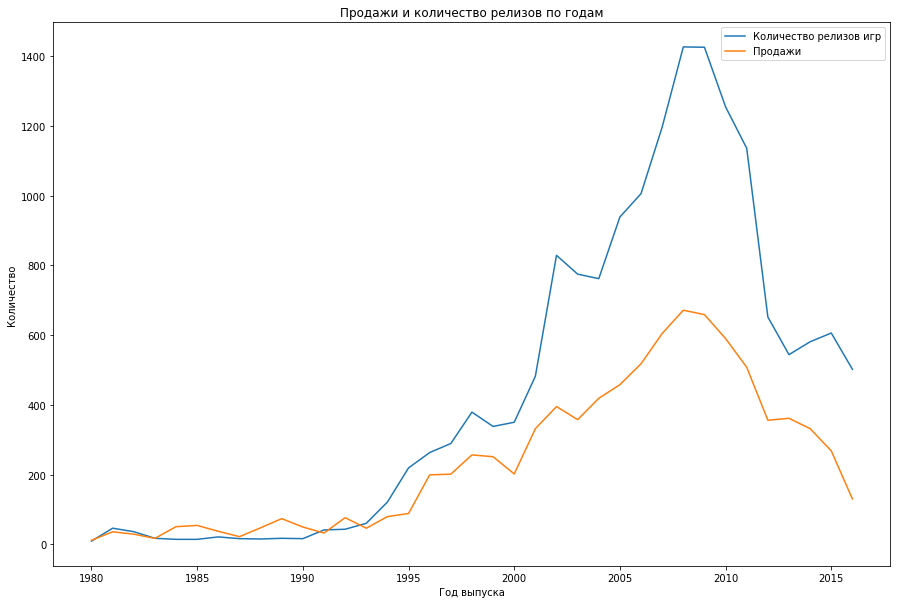

In [29]:
plt.figure(figsize=(15, 10))

games_per_year = games['year_of_release'].value_counts().sort_index()
plt.plot(games_per_year.index, games_per_year.values, label='Количество релизов игр')

total_sales_per_year = games.groupby('year_of_release')['total_sales'].sum().sort_index()
plt.plot(total_sales_per_year.index, total_sales_per_year.values, label='Продажи')

plt.title('Продажи и количество релизов по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество')
plt.legend()
plt.show()

Видим рост количества игр с 2008 года и резкий обвал начиная с 2012. 
С 1980 по 2000 количество выпускаемыых игр было относительно невысоким. 

#### Продажи по платформам. 

Нужно как менялись продажи по платформам

In [30]:
platform_sales = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False) 
print(platform_sales)

platform
PS2     1233.56
X360     961.24
PS3      931.33
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64


In [31]:
top_platforms = platform_sales.head(5).index
print(top_platforms)

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS'], dtype='object', name='platform')


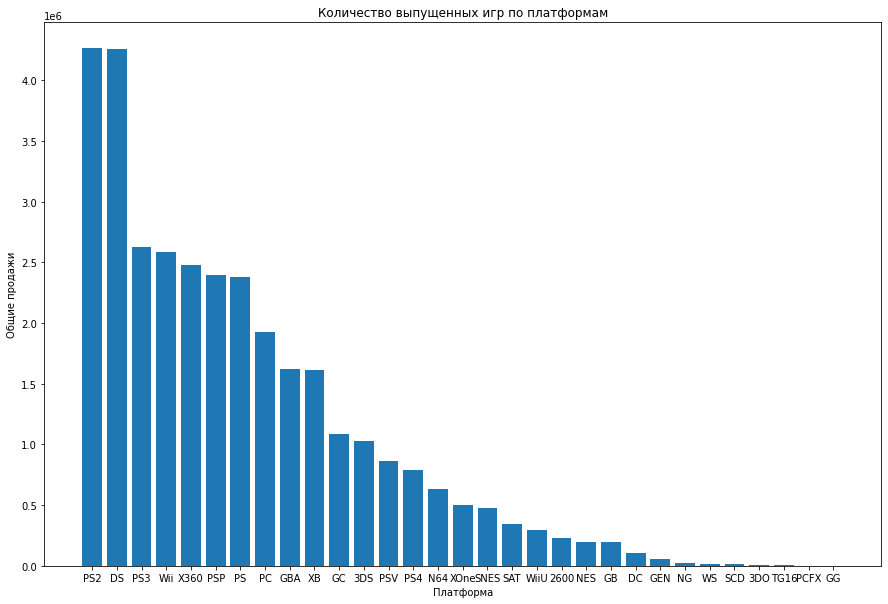

In [32]:
plt.figure(figsize=(15, 10))
platform_sales = games.groupby('platform')['year_of_release'].sum().sort_values(ascending=False)
plt.bar(platform_sales.index,platform_sales.values)
plt.xlabel('Платформа')
plt.ylabel('Общие продажи')
plt.title('Количество выпущенных игр по платформам')
plt.show()

Больше всего игр выпустили для платформ 'PS2', 'DS', 'PS3', 'Wii', 'X360'.А по продажам лидирует PS2. Но это за период 1985-2016. 

In [33]:
platform_sales_per_year = games[games['platform'].isin(top_platforms)]
platform_sales_per_year = platform_sales_per_year.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').fillna(0)
print(platform_sales_per_year)

platform             DS     PS2     PS3     Wii    X360
year_of_release                                        
1985.0             0.02    0.00    0.00    0.00    0.00
2000.0             0.00   39.17    0.00    0.00    0.00
2001.0             0.00  166.43    0.00    0.00    0.00
2002.0             0.00  205.38    0.00    0.00    0.00
2003.0             0.00  184.31    0.00    0.00    0.00
2004.0            17.27  211.81    0.00    0.00    0.00
2005.0           130.14  160.66    0.00    0.00    8.25
2006.0           119.81  103.42   20.96  137.15   51.62
2007.0           146.94   75.99   73.19  152.77   95.41
2008.0           145.31   53.90  118.52  171.32  135.26
2009.0           119.54   26.40  130.93  206.97  120.29
2010.0            85.02    5.64  142.17  127.95  170.03
2011.0            26.18    0.45  156.78   59.65  143.84
2012.0            11.01    0.00  107.35   21.71   99.74
2013.0             1.54    0.00  113.25    8.59   88.58
2014.0             0.00    0.00   47.76    3.75 

<Figure size 1440x720 with 0 Axes>

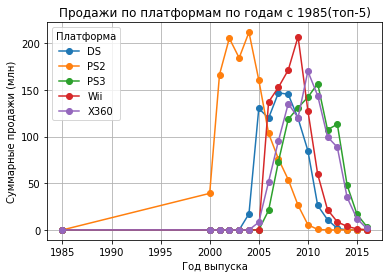

In [34]:
plt.figure(figsize=(20, 10))
platform_sales_per_year.plot(kind='line', marker='o')
plt.title('Продажи по платформам по годам с 1985(топ-5)')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи (млн)')
plt.legend(title='Платформа')
plt.grid(True)
plt.show()

Срок "жизни" платформы составляет примерно 10 лет, дальше начинается постепенный спад. Данные за все года не нужны. 

#### Продажи по платформам новое время 

Cмотрим как меняются продажи за акутальный период и выясняем лидирующие платформы за 2012-2016 года. 

In [36]:
# Фильтрация данных по актуальному периоду (с 2012 года)
recent_games_df = games[games['year_of_release'] >= 2012]

In [37]:
platform_sales = recent_games_df.groupby('platform')['total_sales'].sum().sort_values(ascending=False) 
print(platform_sales)
top_platforms = platform_sales.head(5).index
print(top_platforms)

platform
PS4     314.14
PS3     288.78
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
PSP      11.19
Name: total_sales, dtype: float64
Index(['PS4', 'PS3', 'X360', '3DS', 'XOne'], dtype='object', name='platform')


In [38]:
# Продажи по годам для топ-5 платформ
platform_sales_per_year_recent = recent_games_df[recent_games_df['platform'].isin(top_platforms)]
platform_sales_per_year_recent = platform_sales_per_year_recent.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').fillna(0)
print(platform_sales_per_year_recent)

platform           3DS     PS3     PS4   X360   XOne
year_of_release                                     
2012.0           51.36  107.35    0.00  99.74   0.00
2013.0           56.57  113.25   25.99  88.58  18.96
2014.0           43.76   47.76  100.00  34.74  54.07
2015.0           27.78   16.82  118.90  11.96  60.14
2016.0           15.14    3.60   69.25   1.52  26.15


<Figure size 1080x720 with 0 Axes>

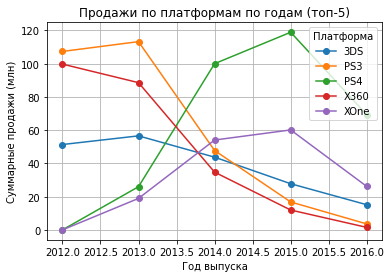

In [39]:
plt.figure(figsize=(15, 10))
platform_sales_per_year_recent.plot(kind='line', marker='o')
plt.title('Продажи по платформам по годам (топ-5)')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи (млн)')
plt.legend(title='Платформа')
plt.grid(True)
plt.show()

Все платформы, кроме PS4 находятся в конце своей жизни и их продажи снижаются с 2013 года. Другая ситцация с PS4: она появилась толлько в 2012, продажи низкие вначале ,но с 2013 уже начинается рост продаж. 

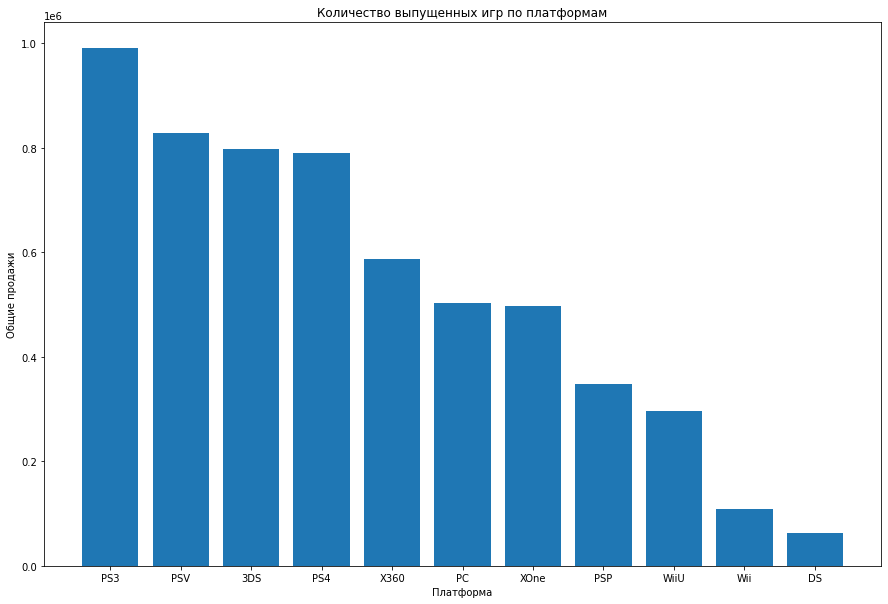

In [40]:
plt.figure(figsize=(15, 10))
platform_sales = recent_games_df.groupby('platform')['year_of_release'].sum().sort_values(ascending=False)
plt.bar(platform_sales.index,platform_sales.values)
plt.xlabel('Платформа')
plt.ylabel('Общие продажи')
plt.title('Количество выпущенных игр по платформам')
plt.show()

Очевидные лидеры продаж за недавний период - PS3,PSV, 3DS,PS4 и X360. 

####  График boxplot по глобальным продажам игр в разбивке по платформам.

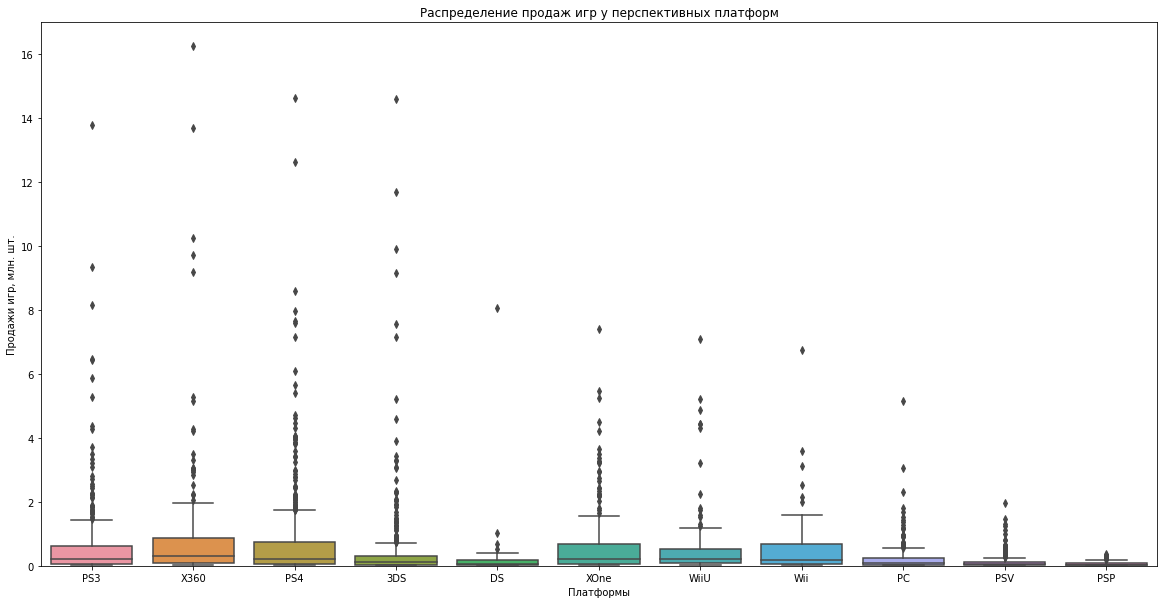

In [41]:
plt.figure(figsize=(20,10))

ax = sns.boxplot(x='platform', y='total_sales', data=recent_games_df)
ax.set_ylim(0, 17,5)
ax.set_ylabel('Продажи игр, млн. шт.')
ax.set_xlabel('Платформы')
ax.set_title('Распределение продаж игр у перспективных платформ')
sns.set_palette("husl")
plt.show()

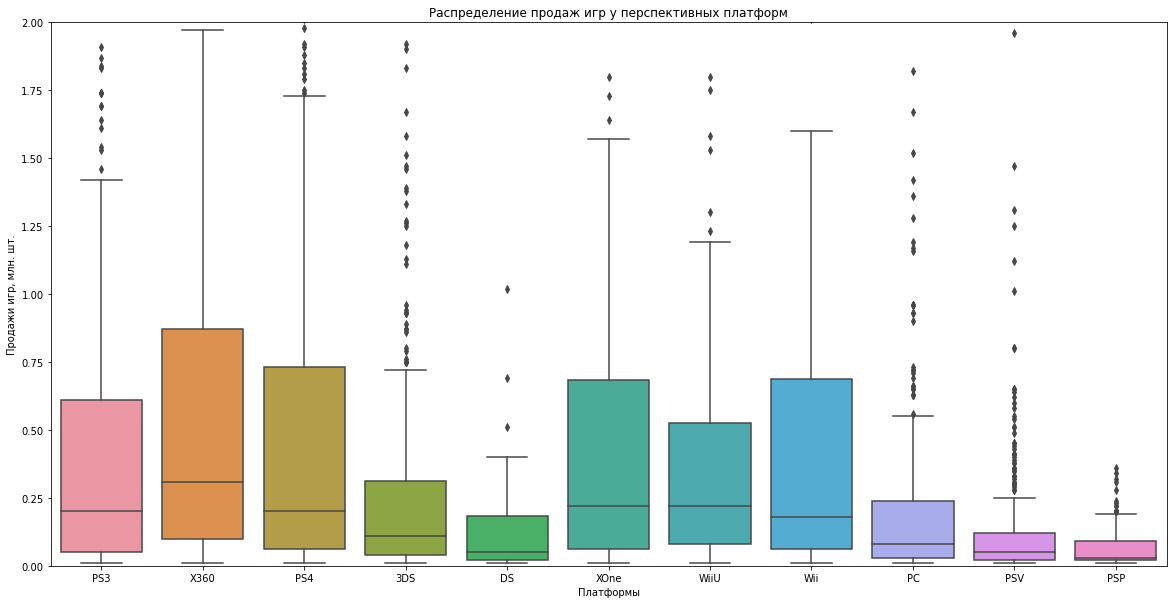

In [42]:
plt.figure(figsize=(20,10))

ax = sns.boxplot(x='platform', y = 'total_sales', data=recent_games_df)
ax.set_ylim(0, 2)
ax.set_ylabel('Продажи игр, млн. шт.')
ax.set_xlabel('Платформы')
ax.set_title('Распределение продаж игр у перспективных платформ')
sns.set_palette("husl")
plt.show()

Медианные значения продаж смещены к нижнему краю – то есть на всех платформах выходит много игр с относительно небольшими продажами. При у кадждой платформы есть бестселлеры, продажи которых могут многократно превышать обычные значения.
на графике видно, что больше всего хитов у платформы X360 и PS3

#### Влияние  на продажи внутри одной популярной платформы отзывы пользователей и критиков. 

Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами

In [43]:
top_platforms = ['PS4', 'PS3', 'X360', '3DS', 'XOne']

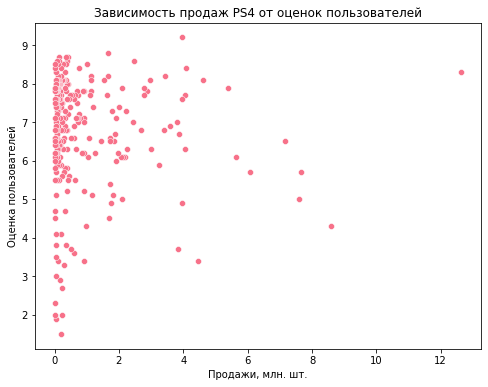

-0.031957110204556376

In [44]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_sales', y='user_score', data=recent_games_df[(recent_games_df['platform'] == 'PS4')\
                                                                      & (recent_games_df['user_score'] > 0)])
plt.title('Зависимость продаж PS4 от оценок пользователей')
plt.xlabel('Продажи, млн. шт.')
plt.ylabel('Оценка пользователей')
plt.show()
recent_games_df[(recent_games_df['platform'] == 'PS4') & (recent_games_df['user_score'] > 0)]['total_sales'].\
corr(recent_games_df[(recent_games_df['platform'] == 'PS4') & (recent_games_df['user_score'] > 0)]['user_score'])

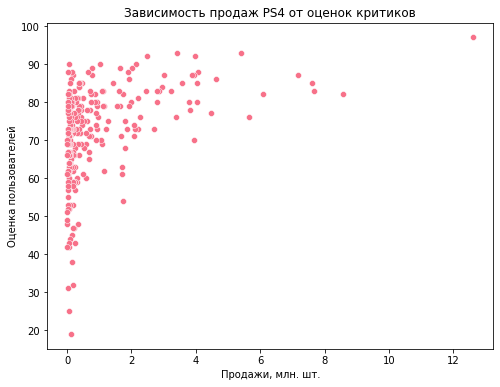

0.406567902061781

In [45]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x = 'total_sales', y = 'critic_score', data=recent_games_df[(recent_games_df['platform'] == 'PS4') \
                                                                            & (recent_games_df['critic_score'] > 0)])
plt.title('Зависимость продаж PS4 от оценок критиков')
plt.xlabel('Продажи, млн. шт.')
plt.ylabel('Оценка пользователей')
plt.show()
recent_games_df[(recent_games_df['platform'] == 'PS4') & (recent_games_df['critic_score'] > 0)]['total_sales'].\
corr(recent_games_df[(recent_games_df['platform'] == 'PS4') & (recent_games_df['critic_score'] > 0)]['critic_score'])

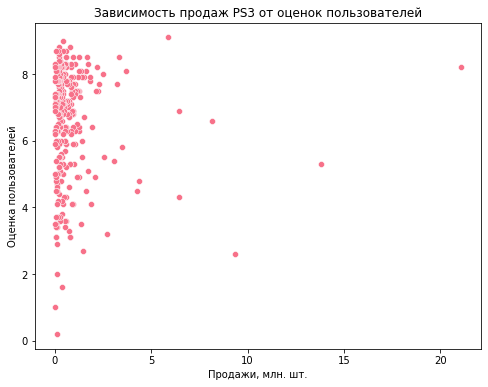

-0.006205767686051522

In [46]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_sales', y='user_score', data=recent_games_df[(recent_games_df['platform'] == 'PS3') \
                                                                      & (recent_games_df['user_score'] > 0)])
plt.title('Зависимость продаж PS3 от оценок пользователей')
plt.xlabel('Продажи, млн. шт.')
plt.ylabel('Оценка пользователей')
plt.show()
recent_games_df[(recent_games_df['platform'] == 'PS3') & (recent_games_df['user_score'] > 0)]['total_sales'].\
corr(recent_games_df[(recent_games_df['platform'] == 'PS3') & (recent_games_df['user_score'] > 0)]['user_score'])

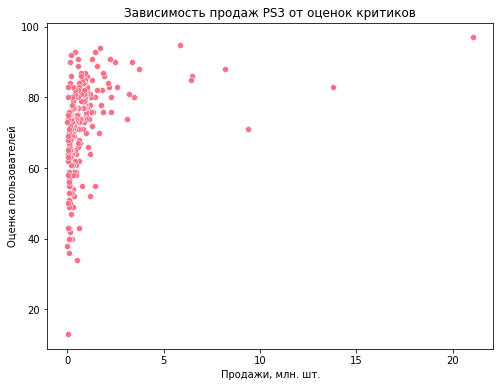

0.3341517575509856

In [47]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_sales', y='critic_score', data=recent_games_df[(recent_games_df['platform'] == 'PS3')\
                                                                        & (recent_games_df['critic_score'] > 0)])
plt.title('Зависимость продаж PS3 от оценок критиков')
plt.xlabel('Продажи, млн. шт.')
plt.ylabel('Оценка пользователей')
plt.show()
recent_games_df[(recent_games_df['platform'] == 'PS3') & (recent_games_df['critic_score'] > 0)]['total_sales'].\
corr(recent_games_df[(recent_games_df['platform'] == 'PS3') & (recent_games_df['critic_score'] > 0)]['critic_score'])

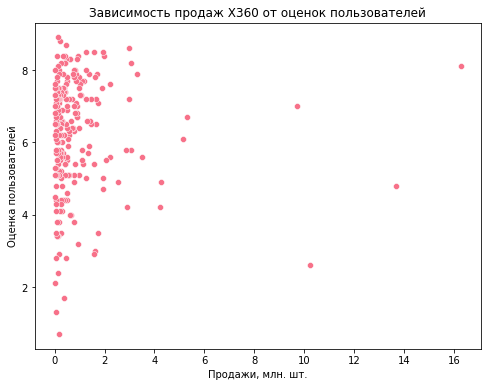

0.0061639786462133256

In [48]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_sales', y='user_score', data=recent_games_df[(recent_games_df['platform'] == 'X360')\
                                                                      & (recent_games_df['user_score'] > 0)])
plt.title('Зависимость продаж X360 от оценок пользователей')
plt.xlabel('Продажи, млн. шт.')
plt.ylabel('Оценка пользователей')
plt.show()
recent_games_df[(recent_games_df['platform'] == 'X360') & (recent_games_df['user_score'] > 0)]['total_sales'].\
corr(recent_games_df[(recent_games_df['platform'] == 'X360') & (recent_games_df['user_score'] > 0)]['user_score'])

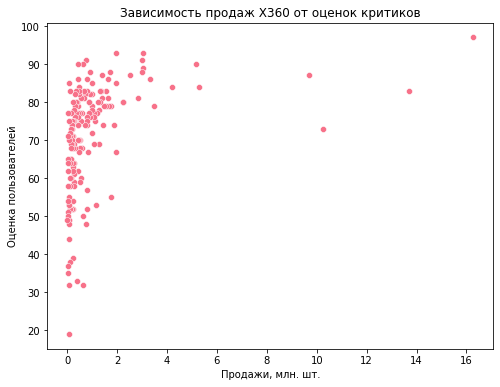

0.36057348885073365

In [49]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_sales', y='critic_score', data=recent_games_df[(recent_games_df['platform'] == 'X360') \
                                                                        & (recent_games_df['critic_score'] > 0)])
plt.title('Зависимость продаж X360 от оценок критиков')
plt.xlabel('Продажи, млн. шт.')
plt.ylabel('Оценка пользователей')
plt.show()
recent_games_df[(recent_games_df['platform'] == 'X360') & (recent_games_df['critic_score'] > 0)]['total_sales'].\
corr(recent_games_df[(recent_games_df['platform'] == 'X360') & (recent_games_df['critic_score'] > 0)]['critic_score'])

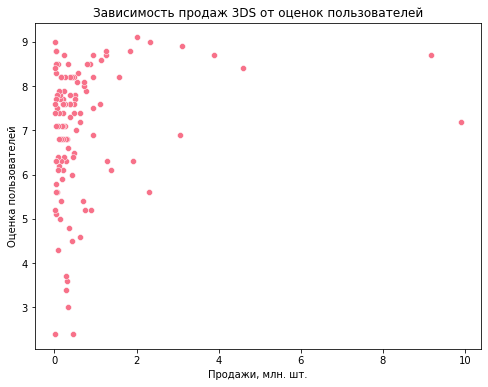

0.19758263411038596

In [50]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_sales', y='user_score', data=recent_games_df[(recent_games_df['platform'] == '3DS') \
                                                                      & (recent_games_df['user_score'] > 0)])
plt.title('Зависимость продаж 3DS от оценок пользователей')
plt.xlabel('Продажи, млн. шт.')
plt.ylabel('Оценка пользователей')
plt.show()
recent_games_df[(recent_games_df['platform'] == '3DS') & (recent_games_df['user_score'] > 0)]['total_sales'].\
corr(recent_games_df[(recent_games_df['platform'] == '3DS') & (recent_games_df['user_score'] > 0)]['user_score'])


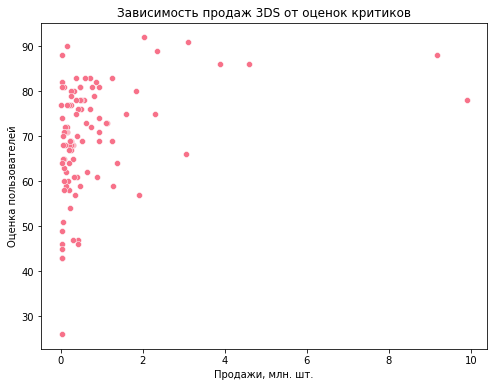

0.32080286953607845

In [51]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_sales', y='critic_score', data=recent_games_df[(recent_games_df['platform'] == '3DS') \
                                                                        & (recent_games_df['critic_score'] > 0)])
plt.title('Зависимость продаж 3DS от оценок критиков')
plt.xlabel('Продажи, млн. шт.')
plt.ylabel('Оценка пользователей')
plt.show()
recent_games_df[(recent_games_df['platform'] == '3DS') & (recent_games_df['critic_score'] > 0)]['total_sales'].\
corr(recent_games_df[(recent_games_df['platform'] == '3DS') & (recent_games_df['critic_score'] > 0)]['critic_score'])


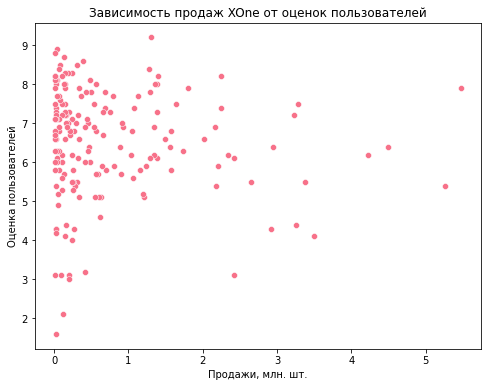

-0.06892505328279412

In [52]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_sales', y='user_score', data=recent_games_df[(recent_games_df['platform'] == 'XOne') \
                                                                      & (recent_games_df['user_score'] > 0)])
plt.title('Зависимость продаж XOne от оценок пользователей')
plt.xlabel('Продажи, млн. шт.')
plt.ylabel('Оценка пользователей')
plt.show()
recent_games_df[(recent_games_df['platform'] == 'XOne') & (recent_games_df['user_score'] > 0)]['total_sales'].\
corr(recent_games_df[(recent_games_df['platform'] == 'XOne') & (recent_games_df['user_score'] > 0)]['user_score'])


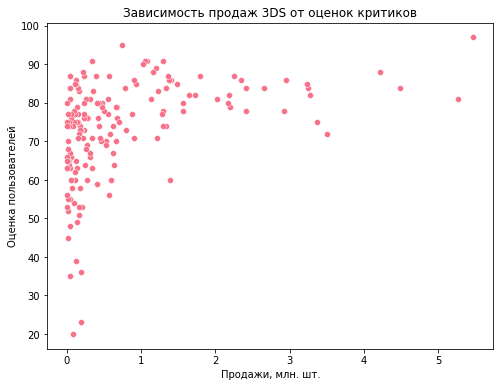

0.41699832800840175

In [53]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_sales', y='critic_score', data=recent_games_df[(recent_games_df['platform'] == 'XOne')\
                                                                        & (recent_games_df['critic_score'] > 0)])
plt.title('Зависимость продаж 3DS от оценок критиков')
plt.xlabel('Продажи, млн. шт.')
plt.ylabel('Оценка пользователей')
plt.show()
recent_games_df[(recent_games_df['platform'] == 'XOne') & (recent_games_df['critic_score'] > 0)]['total_sales'].\
corr(recent_games_df[(recent_games_df['platform'] == 'XOne') & (recent_games_df['critic_score'] > 0)]['critic_score'])


In [54]:
#plt.figure(figsize=(8, 6))
#sns.scatterplot(x='total_sales', y ='user_score', data=recent_games_df.query('platform == "PS3"'))
#plt.title('Зависимость продаж PS3 от оценок пользователей')
#plt.xlabel('Продажи, млн. шт.')
#plt.ylabel('Оценка пользователей')
#plt.show()
#recent_games_df.query('platform == "PS3"')['total_sales'].corr(recent_games_df.query('platform == "PS3"')['user_score'])

In [55]:
#plt.figure(figsize=(8, 6))
#sns.scatterplot(x='total_sales', y='critic_score', data=recent_games_df.query('platform == "PS3"'), alpha=0.7)
#plt.title('Зависимость продаж PS3 от оценок критиков')
#plt.xlabel('Продажи, млн. шт.')
#plt.ylabel('Оценка критиков')
#plt.show()
#recent_games_df.query('platform == "PS3"')['total_sales'].corr(recent_games_df.query('platform == "PS3"')['critic_score'])

In [56]:
#platformx_x360 = recent_games_df[(recent_games_df['platform'] == 'X360') & (recent_games_df['critic_score'] >= 0)]

#platform_ps2 = recent_games_df[(recent_games_df['platform'] == 'PS2') & (recent_games_df['critic_score'] >= 0)]


In [57]:
#recent_games_df.query('platform == "X360"')['total_sales'].corr(recent_games_df.query('platform == "X360"')['critic_score'])

In [58]:
#plt.figure(figsize=(8, 6))
#sns.scatterplot(x='total_sales', y ='user_score', data=recent_games_df.query('platform == "X360"'))
#plt.title('Зависимость продаж X360 от оценок пользователей')
#plt.xlabel('Продажи, млн. шт.')
#plt.ylabel('Оценка пользователей')
#plt.show()

In [59]:
#plt.figure(figsize=(8, 6))
#sns.scatterplot(x='total_sales', y ='critic_score', data=recent_games_df.query('platform == "X360"'))
#plt.title('Зависимость продаж X360 от оценок критиков')
#plt.xlabel('Продажи, млн. шт.')
#plt.ylabel('Оценка критиков')
#plt.show()

In [60]:
#recent_games_df.query('platform == "PS2"')['total_sales'].corr(recent_games_df.query('platform == "PS2"')['critic_score'])

In [61]:
#plt.figure(figsize=(8, 6))
#sns.scatterplot(x='total_sales', y='user_score', data=recent_games_df.query('platform == "PS2"'))
#plt.title('Зависимость продаж PS2 от оценок пользователей')
#plt.xlabel('Продажи, млн. шт.')
#plt.ylabel('Оценка пользователей')
#plt.show()

#plt.figure(figsize=(8, 6))
#sns.scatterplot(x='total_sales', y='critic_score', data=recent_games_df.query('platform == "PS2"'))
#plt.title('Зависимость продаж PS2 от оценок критиков')
#plt.xlabel('Продажи, млн. шт.')
#plt.ylabel('Оценка критиков')
#plt.show()

Практически у всех платформ присутствуем корреляция, между оценками пользователей и критиков к продажам.
Однако оценка пользователей слабо влияет на продажи, чего не скажешь о оценке критиков. Покупатели прислушиваются больше к критикам чем к оценкам других пользователей

#### Распределение игр по жанрам

Посмотрите на общее распределение игр по жанрам.  Выяните самые прибыльные жанры. Выделяются ли жанры с высокими и низкими продажами?

In [63]:
recent_games_df['genre'].value_counts()

Action          1031
Role-Playing     370
Adventure        302
Sports           267
Shooter          235
Misc             192
Racing           115
Fighting         109
Platform          85
Simulation        80
Strategy          71
Puzzle            28
Name: genre, dtype: int64

In [64]:
genre_sales = recent_games_df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
genre_count = recent_games_df['genre'].value_counts()

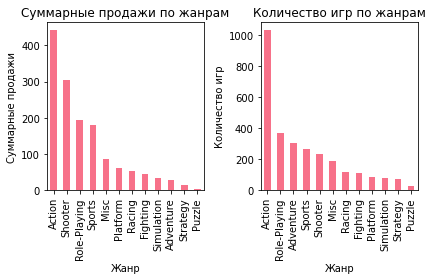

In [65]:
plt.subplot(1, 2, 1)
genre_sales.plot(kind='bar')
plt.title('Суммарные продажи по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Суммарные продажи')
plt.xticks(rotation=90)


plt.subplot(1, 2, 2)
genre_count.plot(kind='bar')
plt.title('Количество игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Количество игр')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


In [66]:
print('Самые прибыльные жанры:')
print(genre_sales.head())

Самые прибыльные жанры:
genre
Action          441.12
Shooter         304.73
Role-Playing    192.80
Sports          181.06
Misc             85.04
Name: total_sales, dtype: float64


Больше всего игр вышло в жанре Action,Misc, Sports, а лидер по продажам стали экшен, шутеры, ролевые и спортивные игры. 

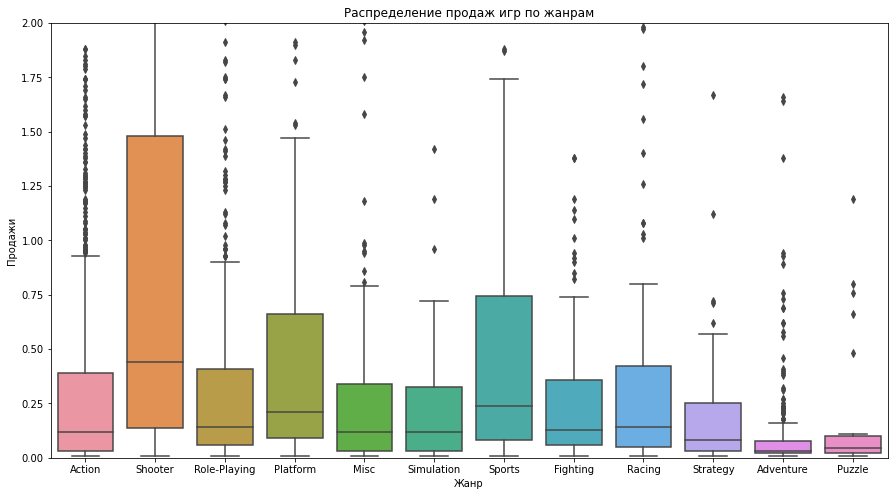

In [67]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.set_ylim(0, 2)
sns.boxplot(x='genre', y='total_sales', data=recent_games_df, ax=ax)
ax.set_title('Распределение продаж игр по жанрам')
ax.set_xlabel('Жанр')
ax.set_ylabel('Продажи')
plt.show()

 Вывод: 
Самым популярным жанром является Shooter. Медианное значение проданных игровых копий  близится к отметке в 500 тысяч. За ним следует жанр Sports , далее идут платформенные игры с похожими показателями. Самые же невостребованные на рынке жанры это Adventure и Puzzle.

Вывод: 

На графике видим рост количества игр с 2008 года и резкий обвал начиная с 2012. С 1980 по 2000 количество выпускаемыых игр было относительно невысоким. Больше всего игр выпустили для платформ 'PS2', 'DS', 'PS3', 'Wii', 'X360'.А по продажам лидирует PS2. Но это за период 1985-2016. Срок "жизни" платформы составляет примерно 7 лет, дальше начинается постепенный спад. Данные за все года не нужны. Очевидные лидеры продаж за недавний период - 'PS4', 'PS3', 'X360', '3DS', 'XOne'.Все платформы, кроме PS4 находятся в конце своей жизни и их продажи снижаются с 2013 года. Другая ситцация с PS4: она появилась толлько в 2012, продажи низкие вначале, но с 2013 уже начинается рост продаж. Заметен нисходящий тренд по продажам для всех платформ за 2008-2016 года. Медианные значения продаж смещены к нижнему краю – то есть на всех платформах выходит много игр с относительно небольшими продажами. При у кадждой платформы есть бестселлеры, продажи которых могут многократно превышать обычные значения.
При проведении корреляции выяснилось следующее: коэф.корреляции говорит о том, что между общим объемом продаж и оценкой критиков есть некоторая связь, но она не очень сильная. Между оценкой пользователей и продажми связь сильнее,но нельзя утверждать о прямой причинно-следственной связи.

Больше всего игр вышло в жанре Action,Misc, Sports, а лидер по продажам стали экшен, шутеры, ролевые и спортивные игры.На диаграмме размаха  видно,что больше всего продаются игры в  жанре Shooter, со значительно более высоким показателем среднего по количеству продаж. Следом следует жанр Sports. А показатели Action здесь значительно меньше. Можем сделать вывод, что игры в жанте Action лидируют по количеству продаж из-за продаж бестселлеров. 

### Портрет пользователя кажого региона

Определение для пользователя каждого региона (NA, EU, JP):

1.Самые популярные платформы (топ-5). 

2.Самые популярные жанры (топ-5).

3.Влияет ли рейтинг ESRB на продажи в отдельном регионе?

#### Самые популярные жанры

In [68]:
recent_games_df['genre'].value_counts()

Action          1031
Role-Playing     370
Adventure        302
Sports           267
Shooter          235
Misc             192
Racing           115
Fighting         109
Platform          85
Simulation        80
Strategy          71
Puzzle            28
Name: genre, dtype: int64

In [69]:
#recent_games_df.groupby(by='genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar')
#recent_games_df.groupby(by='genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
#recent_games_df.groupby(by='genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')

In [70]:
genre_sales = recent_games_df.pivot_table(index='genre',
                                               values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales']).fillna(0)

print(genre_sales)

              eu_sales  jp_sales  na_sales  other_sales
genre                                                  
Action        0.154549  0.051212  0.172493     0.049602
Adventure     0.031325  0.027285  0.029536     0.009305
Fighting      0.098991  0.086606  0.181560     0.041009
Misc          0.137083  0.066979  0.198906     0.039948
Platform      0.251882  0.101529  0.298588     0.065647
Puzzle        0.050000  0.076429  0.040357     0.007857
Racing        0.237304  0.021739  0.149739     0.056435
Role-Playing  0.131162  0.176865  0.172973     0.040081
Shooter       0.482851  0.039277  0.616043     0.158553
Simulation    0.181875  0.130125  0.099625     0.027375
Sports        0.258727  0.030000  0.305356     0.084045
Strategy      0.072817  0.040563  0.059577     0.014930


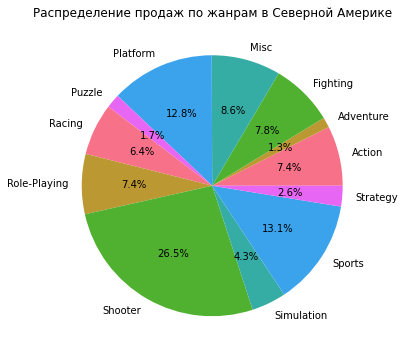

In [71]:
plt.figure(figsize=(10,6))
plt.pie(genre_sales['na_sales'], labels=genre_sales.index, autopct='%1.1f%%')
plt.title('Распределение продаж по жанрам в Северной Америке')
plt.show()

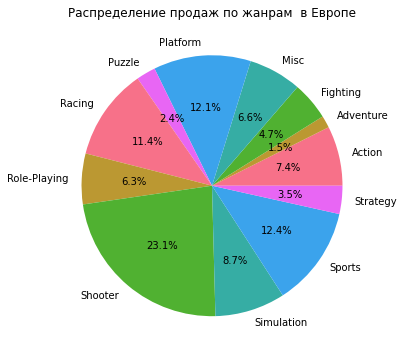

In [72]:
plt.figure(figsize=(10,6))
plt.pie(genre_sales['eu_sales'], labels=genre_sales.index, autopct='%1.1f%%')
plt.title('Распределение продаж по жанрам  в Европе')
plt.show()

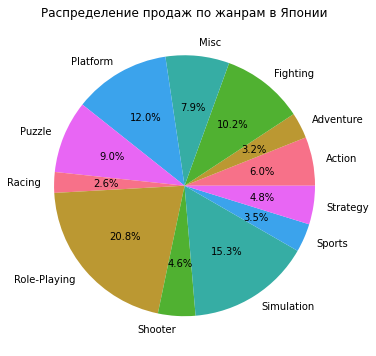

In [73]:
genre_sales_jp = genre_sales[genre_sales['jp_sales'] > 0][['jp_sales']]
genre_sales_jp['jp_sales'] = (genre_sales_jp['jp_sales'] / genre_sales_jp['jp_sales'].sum()) * 100
plt.figure(figsize=(10, 6))
plt.pie(genre_sales_jp['jp_sales'], labels=genre_sales_jp.index, autopct='%1.1f%%', normalize=True)
plt.title('Распределение продаж по жанрам в Японии')
plt.show()

In [74]:
#genre_sales_jp = genre_sales[genre_sales['jp_sales'] > 0]
#plt.figure(figsize=(10, 6))
#plt.pie(genre_sales_jp['jp_sales'], labels=genre_sales_jp.index, autopct='%1.1f%%', normalize=False)
#plt.title('Распределение продаж по жанрам в Японии')
#plt.show()
#recent_games_df['genre_group'] = recent_games_df['genre'].apply(lambda x: x if x in top_genres else 'Другие')
#recent_games_df.loc[:, 'genre_group'] = recent_games_df['genre'].apply(lambda x: 'Другие' if x not in ['Action', 'Role-Playing', 'Adventure', 'Sports', 'Shooter'] else x)
#jp_sales_top5 = recent_games_df.groupby(by='genre_group')['jp_sales'].sum().sort_values(ascending=False)
#eu_sales_top5 = recent_games_df.groupby(by='genre_group')['eu_sales'].sum().sort_values(ascending=False)
#na_sales_top5 = recent_games_df.groupby(by='genre_group')['na_sales'].sum().sort_values(ascending=False)

#plt.figure(figsize=(15, 8))
#plt.subplot(1, 3, 1)
#jp_sales_top5.plot(kind='pie', autopct='%1.1f%%', startangle=90, labels=jp_sales_top5.index)
#plt.title('Топ-5 жанров по продажам в Японии')
#plt.tight_layout()
#plt.show()

#plt.figure(figsize=(15, 8))
#plt.subplot(1, 3, 2)
#eu_sales_top5.plot(kind='pie', autopct='%1.1f%%', startangle=90, labels=eu_sales_top5.index)
#plt.title('Топ-5 жанров по продажам в Европе')
#plt.tight_layout()
#plt.show()

#plt.figure(figsize=(15, 8))
#plt.subplot(1, 3, 3)
#na_sales_top5.plot(kind='pie', autopct='%1.1f%%', startangle=90, labels=na_sales_top5.index)
#plt.title('Топ-5 жанров по продажам в Северной Америке')
#plt.tight_layout()
#plt.show()


Касаемо жанров,в США и Европе самыми популяпными жанрамами стали Shooter. В Японии пользователи предпочитают ролевые игры. Пользователь из США и Европы во многом похожи,а вот пользоватлье из Японии отличается в предпочтениях.

#### Самые популярные платформы (топ-5).

In [75]:
#recent_games_df.groupby(by='platform').\
#agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(10).plot(kind='bar')
#recent_games_df.groupby(by='platform').\
#agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(10).plot(kind='bar')
#recent_games_df.groupby(by='platform').\
#agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(10).plot(kind='bar')

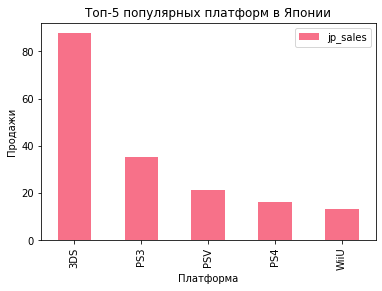

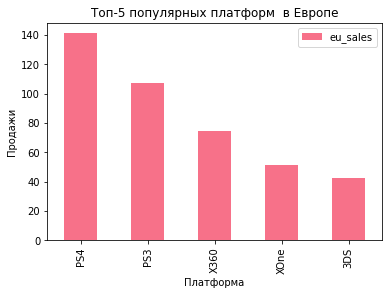

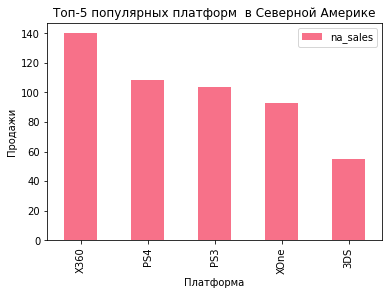

In [76]:
fig, ax = plt.subplots()
recent_games_df.groupby(by='platform').agg({'jp_sales':'sum'}).\
sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar', ax=ax)
ax.set_xlabel('Платформа')
ax.set_ylabel('Продажи')
ax.set_title('Топ-5 популярных платформ в Японии')

plt.show()


fig, ax = plt.subplots()
recent_games_df.groupby(by='platform').agg({'eu_sales':'sum'}).\
sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar', ax=ax)
ax.set_xlabel('Платформа')
ax.set_ylabel('Продажи')
ax.set_title('Топ-5 популярных платформ  в Европе')

plt.show()


fig, ax = plt.subplots()
recent_games_df.groupby(by='platform').agg({'na_sales':'sum'}).\
sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar', ax=ax)
ax.set_xlabel('Платформа')
ax.set_ylabel('Продажи')
ax.set_title('Топ-5 популярных платформ  в Северной Америке')

plt.show()

В Северной Америке лидируют продажи платформы X360 , PS4 и PS3. В Европе топ-3 по продажам являются PS4, PS3 и X360. В Японии опять картина отличается от запада, там лидирует платформа 3DS,затем идут PS3 и PSV. 

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

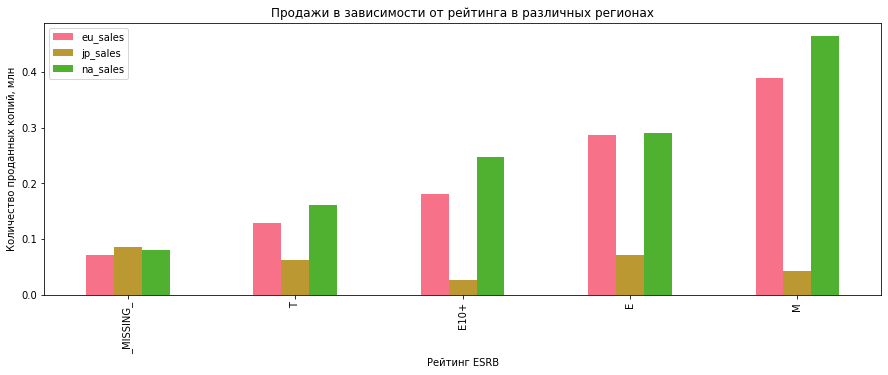

In [77]:
(
    recent_games_df.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='mean')
    .sort_values(by='na_sales')
    .plot(kind='bar', figsize=(15, 5))
)
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Количество проданных копий, млн')
plt.title('Продажи в зависимости от рейтинга в различных регионах')
plt.show()

Топ самых продаваемых игр в одной категорий в CША и Европе совпадает. Больше всего продаются игры с рейтингом "для взрослых (от 17 лет)". Следом идут игры для всех(от 6 лет). За ними идут игры для школьников и подростков. Компания-основатель рейтинга ESRB работает только на территории США и Канады.На Японию этот рейтинг не распространяется.  

Касаемо жанров,в США и Европе самыми популяпными жанрамами стали Shooter и Action. В Японии пользователи предпочитают ролевые игры. Пользователь из США и Европы во многом похожи,а вот пользоватлье из Японии отличается в предпочтениях. В Северной Америке лидируют продажи платформы X360 b PS4 и PS3. D Европе топ-3 по продажам являются PS4, PS3 и X360. В Японии опять картина отличается от запада, там лидирует платформа 3DS, PS и PSV.Топ самых продаваемых игр в одной категорий в CША и Европе совпадает. Больше всего продаются игры с рейтингом "для взрослых (от 17 лет)". Следом идут игры для всех(от 6 лет). За ними идут игры для школьников и подростков. Компания-основатель рейтинга ESRB работает только на территории США и Канады.На Японию этот рейтинг не распространяется.

### Проверка гипотез 

Для подтверждения гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам иcпользуется метод st.stats.ttest_ind, также известный как t-тест Уэлча или t-тест Стьюдента.

Гипотеза 1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Это и будет нулевой гипотезой.

H0: Средние пользовательские рейтинги Xbox One и PC одинаковые

H1: Средние пользовательские рейтинги Xbox One и PC разные.

Для подтверждения гипотезы сделаем два среза по актуальному датафрейму - выделим отдельно данные по Xbox One и PC. 


In [78]:
xbox_one_scores = recent_games_df[(recent_games_df['platform'] == 'XOne') & (recent_games_df['user_score'] > 0)]['user_score']
pc_scores = recent_games_df[(recent_games_df['platform'] == 'PC') & (recent_games_df['user_score'] > 0)]['user_score']

results = st.ttest_ind(xbox_one_scores, pc_scores)
alpha = 0.05

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')  

p-значение: 0.5535080500643661
Не отвергаем нулевую гипотезу


Вывод по гипотезе 1: На имеющихся данных, на уровне значимости 5% нет оснований отвергнуть нулевую гипотезу в пользу альтернативы. Предположение о равенстве среднего рейтинга верно.

Гипотеза 2: Средние пользовательские рейтинги жанров Action и Sports разные.
Проверим, отличаются ли средние пользовательские рейтинги жанров Экшен и Спорт.Значение критического уровня вероятности примем равным 5%.Пропущенные значечния отфильтруем.

H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые

H1: Средние пользовательские рейтинги жанров Action и Sports разные


In [79]:
action_scores = recent_games_df[(recent_games_df.genre == "Action") & (recent_games_df['user_score'] > 0)]['user_score']
sports_scores = recent_games_df[(recent_games_df.genre == "Sports") & (recent_games_df['user_score'] > 0)]['user_score']

results = st.ttest_ind(action_scores, sports_scores) 
alpha = 0.05

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение: 4.8045233804629176e-26
Отвергаем нулевую гипотезу


Вывод по гипотезе 2: На имеющихся данных, на уровне значимости 5%  есть основания отвергнуть нулевую гипотезу.Можно сделать вывод, что средние оценки пользователей жанров Action и Sports могут отличаться.

Прошу прошения, случайно удалила код :(

 Выводы
 
В первом случае, на имеющихся данных, на уровне значимости 5% нет оснований отвергнуть нулевую гипотезу в пользу альтернативы. Предположение о равенстве среднего рейтинга верно.

Во втором случае,на имеющихся данных, на уровне значимости 5%  есть основания отвергнуть нулевую гипотезу.  Можно сделать вывод, что оценки пользователей  жанров Action и Sports могут отличаться.

### Общий вывод. 

При подготовке данных были проделаны слеующие шаги : записи привидены к нижнему регистру,год выпуска игры приведен к нужному типу данных, в столбцах оценнки критиков и пользователей много пропусков но заполнить медианой и  мы не можем поэтому заменяем на (-1). Аббевиатура 'tbd'в user_score означает, что к оценке вернутся позже. Пропуски в рейтинге заполнили _MISSING_. Создали столбец с суммой продаж по всему миру.  Пропуски могли вознкнуть по след.причинам: в случае выхода игры, информация могла быть не предосавлена на момент сбора датасета. 
В случае столбца name = это мог быть человееский фактор. В столбце user_score и critic_score - вполне возможно, что игры не оценивались критиками и пользователями. Пропуски в столбце rating - рейтинг от ESRB - могут быть вызваны, тем что компания просто не оценивал игру, так как работает только на территори США и Канады. 

На графике видим рост количества игр с 2008 года и резкий обвал начиная с 2012. С 1980 по 2000 количество выпускаемыых игр было относительно невысоким. Больше всего игр выпустили для платформ 'PS2', 'DS', 'PS3', 'Wii', 'X360'. А по продажам лидирует PS2. Но это за период 1985-2016. Срок "жизни" платформы составляет примерно 7 лет, дальше начинается постепенный спад. Данные за все года не нужны.Возьмем для анализа 5ий период. Очевидные лидеры продаж за недавний период - 'PS4', 'PS3', 'X360', '3DS', 'XOne'.Все платформы, кроме PS4 находятся в конце  жизнненного цикла и их продажи снижаются с 2013 года. Другая ситцация с PS4: она появилась толлько в 2012, продажи низкие вначале, но с 2013 уже начинается рост продаж. Заметен нисходящий тренд по продажам для всех платформ за 2008-2016 года. Медианные значения продаж смещены к нижнему краю – то есть на всех платформах выходит много игр с относительно небольшими продажами. При у кадждой платформы есть бестселлеры, продажи которых могут многократно превышать обычные значения. При проведении корреляции выяснилось следующее: коэф.корреляции говорит о том, что между общим объемом продаж и оценкой критиков есть некоторая связь, но она не очень сильная. Между оценкой пользователей и продажми связь сильнее,но нельзя утверждать о прямой причинно-следственной связи.

Больше всего игр вышло в жанре Action,Misc, Sports, а лидер по продажам стали экшен, шутеры, ролевые и спортивные игры.На диаграмме размаха видно,что больше всего продаются игры в жанре Shooter, со значительно более высоким показателем среднего по количеству продаж. Следом следует жанр Sports. А показатели Action здесь значительно меньше. Можем сделать вывод, что игры в жанте Action лидируют по количеству продаж из-за продаж бестселлеров.

В рамках сосиавления портрета пользователей было выяснено,что в США и Европе самыми популяпными жанрамами стали Shooter и Action. В Японии пользователи предпочитают ролевые игры. Пользователь из США и Европы во многом похожи,а вот пользоватлье из Японии отличается в предпочтениях. В Северной Америке лидируют продажи платформы X360 b PS4 и PS3. D Европе топ-3 по продажам являются PS4, PS3 и X360. В Японии опять картина отличается от запада, там лидирует платформа 3DS, PS и PSV.Топ самых продаваемых игр в одной категорий в CША и Европе совпадает. Больше всего продаются игры с рейтингом "для взрослых (от 17 лет)". Следом идут игры для всех(от 6 лет). За ними идут игры для школьников и подростков. Компания-основатель рейтинга ESRB работает только на территории США и Канады.На Японию этот рейтинг не распространяется.

В рамках проведения гиптез, мы выяснили:  
В первом случае, на имеющихся данных, на уровне значимости 5% нет оснований отвергнуть нулевую гипотезу в пользу альтернативы. Предположение о равенстве среднего рейтинга двух игровых платформ верно.

Во втором случае,на имеющихся данных, на уровне значимости 5%  есть основания отвергнуть нулевую гипотезу.  Можно сделать вывод, что оценки пользователей  жанров Action и Sports могут отличаться.

В ходе работы было выяснено,что рекламные компании будут в Европе и США отличаться не сильно, а вот в для Японии нужно будет ставить акценты на другое.  
В США на первом месте по популярности Shooters,спортивные игры и платформеры. Большей популярностью пользуется их платформа - X360.
В Европе также лидируют шутеры, споривные игры, платформеры, также активно играют в гонки. Самая популярная плафтома - PS4 и PS3. 
В Японии ситуация другая, там лидиркют ролевын игры и симуляции. Популярная платформа - 3DS.
Больше всего продаются игры с рейтингом "для взрослых (от 17 лет)



